# Churn Predictions

Modelo de deteccion de Churn.
La bibliografia sugiere que hay dos tipos de relacion con el cliente. La primera orientado a negocios contractuales, con membresias fijas periodicas y la segunda, negocios sin contrato, de compras esporadicas, retail, etc. 

En este trabajo se desarrolla un modelo simple para predecir cuando un cliente va a dejar de serlo y en que probabilidad. 

De esta forma se propone generar alarmas para poder realizar acciones preventivas (promociones, acciones de fidelizacion, etc). 

Este Notebook contiene un EDA de un dataset de servicio de Telefonia/internet, y un ejemplo del modelo predictivo donde el negocio es del tipo contractual.


In [1]:
# Importamos las librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


In [2]:
# cargamos el dataset en caso de usar Colab
#from google.colab import files
#upload = files.upload()

In [3]:
df = pd.read_csv("Tel_Customer_Churn_Dataset.csv")

In [4]:
df_original = df.copy()

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
#Tipos de datos y #
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Estadisticos de las variables numericas
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
#Verificamos que no tiene valores faltantes
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Las clases estan desbalanceadas. 
df.Churn.value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

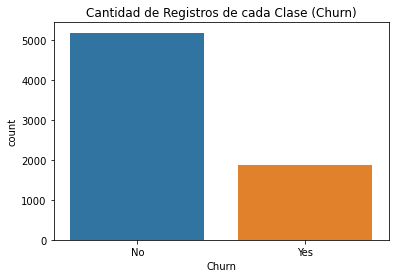

In [12]:
sns.countplot(x=df["Churn"])
plt.title("Cantidad de Registros de cada Clase (Churn)")
plt.show()

In [13]:
percent_churn = df.Churn.value_counts(normalize=True)*100
print(f"Porcentaje de clientes que Permanencen: {round(percent_churn[0])} %")
print(f"Porcentaje de clientes que se Perdieron: {round(percent_churn[1])} %")

Porcentaje de clientes que Permanencen: 73 %
Porcentaje de clientes que se Perdieron: 27 %


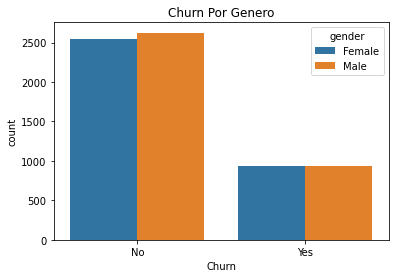

In [14]:
sns.countplot(x=df["Churn"], hue= df["gender"])
plt.title("Churn Por Genero")
plt.show()

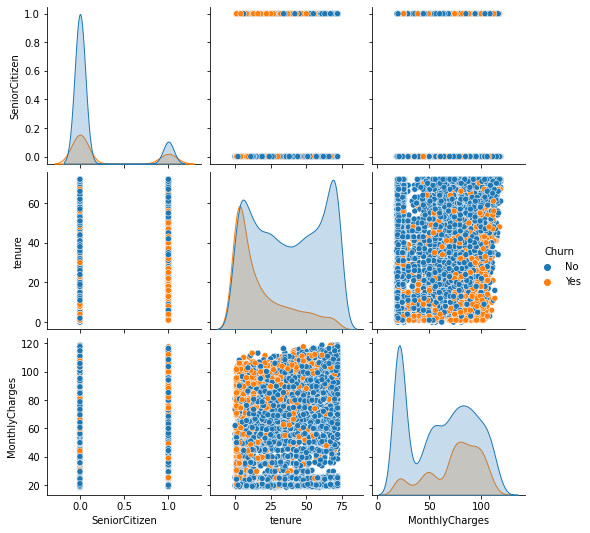

In [15]:
sns.pairplot(data=df, hue="Churn")
plt.show()

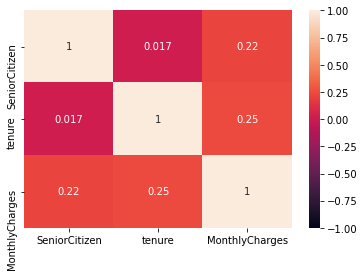

In [16]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True )
plt.show()

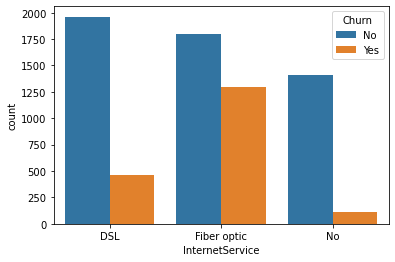

In [17]:
#Visualizamos churn count para el tipo de servicio de internet
sns.countplot(x='InternetService', hue='Churn', data = df)
plt.show()

Podemos ver que la mayoria de los clientes perdidos estan relacionados al sevicio de Fibra Optica.


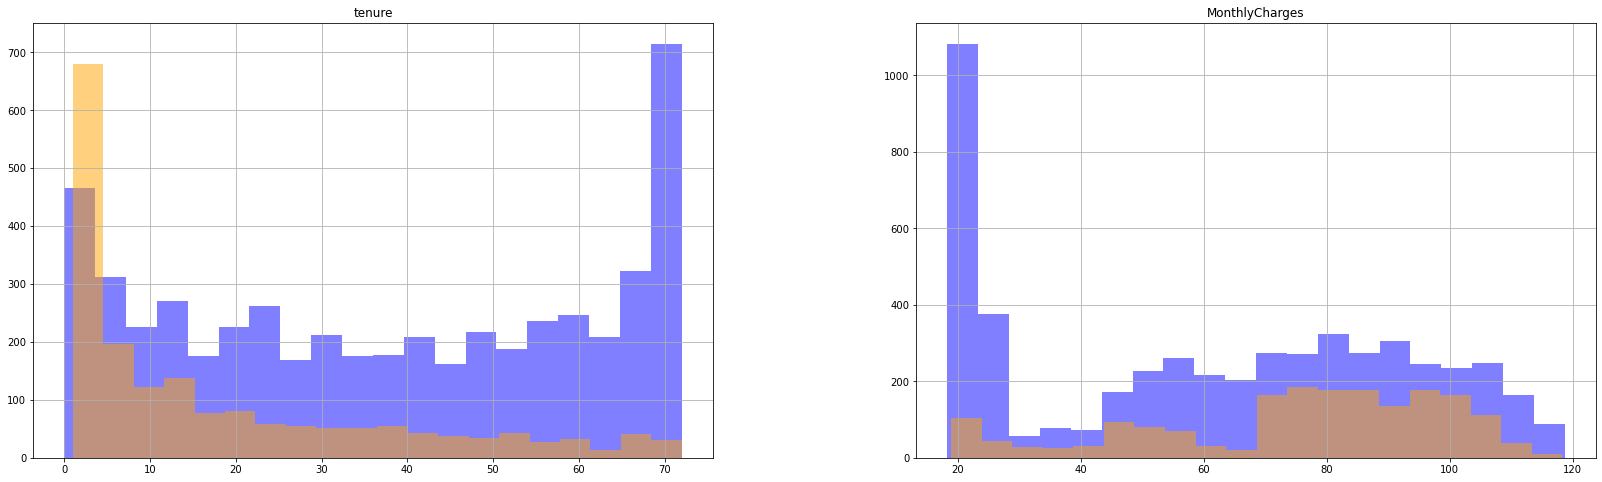

In [18]:
#Vemos con detalle la distribucion de Tenure y Monthly Charges en relacion al Churn
numerical_features = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1, 2, figsize=(28, 8))
df[df.Churn == 'No'][numerical_features].hist(bins=20, color="blue", alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][numerical_features].hist(bins=20, color="orange", alpha=0.5, ax=ax)
plt.show()

En estas grafiacs podemos ver que la mayoria de los clientes que se retuvieron se encuentran con cargos en el servicio en el orden de 20 / 30 mientras que los clientes perdidos en el orden del 80/100. 

Una posible accion a tomar seria evaluar la politica de precios.

En cuanto a la grafica de Tenure, podemos ver que tambien estan los valores discriminados. La mayoria de los clientes retenidos tienen un tenure entre 60/70 meses, y los clientes perdidos mayormente son antesl del año --> 10 meses. 

En la medida que se logre mantener a los clientes durante el primer año las probabilidades de la baja disminuyen

## Pre Procesamiento de Datos

In [75]:
#Removemos la columna innecesaria: customerID
cleaned_df = df.drop('customerID', axis=1)

In [76]:
#Look at the number of rows and cols in the new data set
cleaned_df.shape

(7043, 20)

In [77]:
cleaned_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [78]:
## Feature Engeneering
from pandas.api.types import is_numeric_dtype

In [79]:
# Total Charges esta cargado como String
cleaned_df['TotalCharges'].dtype

dtype('O')

In [80]:
is_numeric_dtype(cleaned_df['TotalCharges'].dtype)

False

In [81]:
# Vamos a Aplicarle esta trasnformacion a todo la Serie
float(cleaned_df['TotalCharges'][0])

29.85

In [82]:
cleaned_df['TotalCharges'] = cleaned_df['TotalCharges'].apply(lambda x: float(x) if x != " " else 0)

In [83]:
# Verificamos que se convirtio Correctamente
cleaned_df['TotalCharges'][0]

29.85

### Encoding:

Vamos a realizar el Encoding con el siguiente criterio: 
Para los features que son binarios usaremos un label_encoding, unicamente para pasar a numero los valores. 
Para los features que tienen mas de dos categorias, usaremos un One_hot encoding, para evitar que el modelo pondere una categoria sobre otra. 

In [84]:
# Evaluamos cuantas clases tiene cada categoria para encodear de una manera u otra
numeric= []
one_hot =[]
label =[]

for i in cleaned_df.columns:
    print(f"Columna: {i} " + f"Cantidad de Categorias: {len(cleaned_df[i].value_counts())}")
    if is_numeric_dtype(cleaned_df[i].dtype) and len(cleaned_df[i].value_counts())>2 :
        print("--- numeric ---")
        numeric.append(i)
    elif len(cleaned_df[f"{i}"].value_counts()) > 2:
        print ("--- OneHot ---")
        one_hot.append(i)
    else:
        print("--- Label ---")
        label.append(i)

Columna: gender Cantidad de Categorias: 2
--- Label ---
Columna: SeniorCitizen Cantidad de Categorias: 2
--- Label ---
Columna: Partner Cantidad de Categorias: 2
--- Label ---
Columna: Dependents Cantidad de Categorias: 2
--- Label ---
Columna: tenure Cantidad de Categorias: 73
--- numeric ---
Columna: PhoneService Cantidad de Categorias: 2
--- Label ---
Columna: MultipleLines Cantidad de Categorias: 3
--- OneHot ---
Columna: InternetService Cantidad de Categorias: 3
--- OneHot ---
Columna: OnlineSecurity Cantidad de Categorias: 3
--- OneHot ---
Columna: OnlineBackup Cantidad de Categorias: 3
--- OneHot ---
Columna: DeviceProtection Cantidad de Categorias: 3
--- OneHot ---
Columna: TechSupport Cantidad de Categorias: 3
--- OneHot ---
Columna: StreamingTV Cantidad de Categorias: 3
--- OneHot ---
Columna: StreamingMovies Cantidad de Categorias: 3
--- OneHot ---
Columna: Contract Cantidad de Categorias: 3
--- OneHot ---
Columna: PaperlessBilling Cantidad de Categorias: 2
--- Label ---
Col

In [85]:
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
    if column in numeric:
              pass
    elif column in one_hot:
        cleaned_df = pd.concat([cleaned_df, pd.get_dummies(cleaned_df[column], prefix=str(column)+"_")], axis=1)
        cleaned_df.drop(columns=column, inplace=True)
        print(column)
    else:
        cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])  

MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaymentMethod


In [86]:
#Checkeamos los nuevos data types
cleaned_df.dtypes

gender                                        int32
SeniorCitizen                                 int64
Partner                                       int32
Dependents                                    int32
tenure                                        int64
PhoneService                                  int32
PaperlessBilling                              int32
MonthlyCharges                              float64
TotalCharges                                float64
Churn                                         int32
MultipleLines__No                             uint8
MultipleLines__No phone service               uint8
MultipleLines__Yes                            uint8
InternetService__DSL                          uint8
InternetService__Fiber optic                  uint8
InternetService__No                           uint8
OnlineSecurity__No                            uint8
OnlineSecurity__No internet service           uint8
OnlineSecurity__Yes                           uint8
OnlineBackup

In [87]:
cleaned_df.shape

(7043, 41)

In [88]:
#Scalamos los datos
X = cleaned_df.drop('Churn', axis = 1) 
y = cleaned_df['Churn']
#Standardizing/scaling 
X = StandardScaler().fit_transform(X)

In [89]:
#Dividimos el dataset en 70/30
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [90]:
#Instanciamos el modelo
model = LogisticRegression()
#entrenamos
model.fit(x_train, y_train)

LogisticRegression()

In [91]:
predictions = model.predict(x_test)

In [92]:
#Checkeamos precision, recall, f1-score
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [93]:
from sklearn.svm import SVC

In [94]:
model2= SVC(gamma='auto')

In [95]:
model2.fit(x_train, y_train)

SVC(gamma='auto')

In [96]:
predictions2 = model2.predict(x_test)

In [97]:
print( classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1552
           1       0.65      0.50      0.56       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.79      2113



In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
model3 = RandomForestClassifier(max_depth=None, n_estimators=1000)

In [100]:
model3.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [101]:
predictions3= model3.predict(x_test)

In [102]:
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1552
           1       0.61      0.48      0.53       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [103]:
from sklearn.linear_model import LogisticRegressionCV

In [104]:
model4 = LogisticRegressionCV(cv=50)

In [105]:
model4.fit(x_train, y_train)

LogisticRegressionCV(cv=50)

In [106]:
predictions4 = model4.predict(x_test)

In [107]:
print(classification_report(y_test, predictions4))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [108]:
modelos = [model, model2, model3, model4]
predictions_list = [predictions, predictions2, predictions3, predictions4]
titulos = ["Logistic", "SVC", "RandomForest", "LogistiCV"]

In [109]:
resultados = pd.DataFrame()

In [110]:
from sklearn import metrics

In [111]:
# funcion para ingresar a la tabla de resultados los modelos
def evaluar_clf(titulo, y_pred, y_test):
    entrada= {"Modelo": titulo,'Performance':metrics.f1_score(y_test, y_pred, average='micro')}
    global resultados
    resultados = resultados.append(entrada, ignore_index=True)
    return resultados

In [112]:
for i in range(4):
    evaluar_clf(titulos[i],predictions_list[i],y_test)


In [113]:
resultados

,Modelo,Performance
0,Logistic,0.809276
1,SVC,0.794132
2,RandomForest,0.779460
3,LogistiCV,0.808329


In [123]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


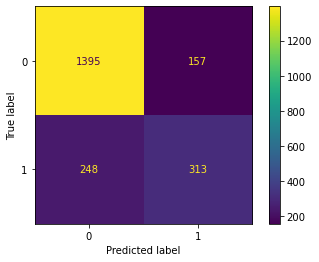

In [126]:
plot_confusion_matrix(model4, x_test, y_test)
plt.show()

Podemos ver que el modelo performa bien unicamente para detectar la clase 0 que no es nuestro interes, si no mas bien la clase 1. De todas maneras al tener alta precision y recall en la clase 0, podria performar relativamente bien para la clase 1, sobre todo si aumentamos el umbral de decision. 

Considero que se debe al desbalanceo de los datos, de los casi 7 mil registros solo 2 mil pertenecian a la clase 1. En la medida de poder conseguir mas datos es posible mejorar la performance. 

Vamos a seleccionar el Modelo de Regresion Logistica con CV. De todas maneras el modelo podria mejorarse con mayor cantidad de datos o probar otros modelos mas complejos realizando una optimizacion de hiperparametros. 

In [114]:
df_original["Probabilidad_de_Churn"] = model4.predict_proba(X)[:,1]

In [115]:
df_original["Prediccion_modelo"] = model4.predict(X)

In [116]:
df_final = df_original[["customerID", "Churn", "Probabilidad_de_Churn", "Prediccion_modelo"]]

In [118]:
df_final[500:520]

,customerID,Churn,Probabilidad_de_Churn,Prediccion_modelo
500,4374-YMUSQ,No,0.138924,0
501,4513-CXYIX,No,0.040284,0
502,3957-HHLMR,No,0.017575,0
503,7803-XOCCZ,No,0.103243,0
504,5736-YEJAX,No,0.010321,0
505,5609-CEBID,Yes,0.685081,1
506,8981-FJGLA,No,0.589454,1
507,7218-HKQFK,Yes,0.716934,1
508,4636-QRJKY,Yes,0.576046,1
509,1135-LMECX,No,0.191403,0


## Resultado Final

Como vemos el modelo funciona relativamente bien, en la medida que tome mas datos se podra mejorar su performance, aun puede optimizarse y ademas tambien modificar el umbral de decision de acuerdo a cada cliente, es decir tomar valores de probabilidad mas bajos (35%) para definir acciones de recuperacion de clientes preventivas, etc